In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#
# Darbo tikslas: išanalizuoti automobilių išmetamųjų dujų tendencijas pagal automobilių technines charakteristikas

#
# Hipotezė: vyrauja reikšmingas susirūpinimas aplinkosauga, tačiau mažiausią taršumą gali pasiekti tik tam tikrų charakteristikų automobiliai.

#
#
# 1. Duomenų įsikėlimas

   Turime 11 failų su informacija apie 2023 - 2013 metus. Kiekvieno failo pavadinimas atitinkamai skiriasi tik skaičiumi "all_alpha_13.xlsx" - "all_alpha_23.xlsx".
   
   Kadangi informacija atsikartoja aiškiai numatoma sąlyga galima naudoti ciklą dataFrame kintamųjų nuskaitymui. Taip pat, kadangi turime daug tokių pat duomenų tik skirtingais metais, patogu juos patalpinti į sąrašą (list).

In [2]:
Failo_sk = range(13,24)
data_list = []

In [3]:
for sk in Failo_sk:
    pavadinimas = f'all_alpha_{sk}.xlsx'
    duomenys = pd.read_excel(pavadinimas)
    data_list.append(duomenys)

In [4]:
len(data_list)

11

In [5]:
data_list[0]

Model  Displ  Cyl       Trans Drive      Fuel Sales Area  Stnd  \
0       ACURA ILX    1.5  4.0       SCV-7   2WD  Gasoline         FC    B3   
1       ACURA ILX    1.5  4.0       SCV-7   2WD  Gasoline         FA    B2   
2       ACURA ILX    1.5  4.0       SCV-7   2WD  Gasoline         CA  PZEV   
3       ACURA ILX    2.0  4.0  SemiAuto-5   2WD  Gasoline         FA    B5   
4       ACURA ILX    2.0  4.0  SemiAuto-5   2WD  Gasoline         CA    U2   
...           ...    ...  ...         ...   ...       ...        ...   ...   
2392  VOLVO XC 70    3.2  6.0  SemiAuto-6   2WD  Gasoline         CA    U2   
2393  VOLVO XC 90    3.2  6.0  SemiAuto-6   4WD  Gasoline         FA    B5   
2394  VOLVO XC 90    3.2  6.0  SemiAuto-6   4WD  Gasoline         CA    U2   
2395  VOLVO XC 90    3.2  6.0  SemiAuto-6   2WD  Gasoline         FA    B5   
2396  VOLVO XC 90    3.2  6.0  SemiAuto-6   2WD  Gasoline         CA    U2   

            Stnd Description  Underhood ID     Veh Class Air Pollution Score  \
0       Federal Tier 2 Bin 3  DHNXV01.5WF2     small car                   7   
1       Federal Tier 2 Bin 2  DHNXV01.5YD2     small car                   8   
2            California PZEV  DHNXV01.5YD2     small car                   9   
3       Federal Tier 2 Bin 5  DHNXV02.0CB2     small car                   5   
4     California LEV-II ULEV  DHNXV02.0CB2     small car                   6   
...                      ...           ...           ...                 ...   
2392  California LEV-II ULEV  DVVXJ03.2U2N     small SUV                   6   
2393    Federal Tier 2 Bin 5  DVVXJ03.2U2N  standard SUV                   5   
2394  California LEV-II ULEV  DVVXJ03.2U2N  standard SUV                   6   
2395    Federal Tier 2 Bin 5  DVVXJ03.2U2N  standard SUV                   5   
2396  California LEV-II ULEV  DVVXJ03.2U2N  standard SUV                   6   

     City MPG Hwy MPG Cmb MPG Greenhouse Gas Score SmartWay Comb CO2  
0          39      38      38                    9      Yes      228  
1          39      38      38                    9      Yes      228  
2          39      38      38                    9      Yes      228  
3          24      35      28                    7       No      318  
4          24      35      28                    7      Yes      318  
...       ...     ...     ...                  ...      ...      ...  
2392       19      25      21                    5       No      414  
2393       16      23      18                    4       No      477  
2394       16      23      18                    4       No      477  
2395       16      23      19                    4       No      472  
2396       16      23      19                    4       No      472  

[2397 rows x 18 columns]

## 1.1. Duomenų formatavimas
 Apžiūrėję duomenis galime pastebėti, kad nors informacija nuskaityta iš 2013 metų failo, lentelėje nėra jokio indikatoriaus (stulpelio) apie tai. Todėl prieš sujungiant lenteles į vieną vientisą lentelę pridėsime metų stulpelį kiekvienai iš jų. 

Kadangi veiksmas kartotinis vėl galime panaudoti ciklą.

In [6]:
Metai = range(2013,2024)

In [7]:
for i in range(len(data_list)):
    data_list[i]['Year'] = Metai[i]

Pasitikriname ar stulpeliai su reikšmėmis susikūrė. Tuo pačiu patikrindami ar visi kiti stulpeliai sutampa:

In [8]:
for i in range(len(data_list)):
    print(data_list[i]['Year'].head(1), data_list[i].columns.tolist())

0    2013
Name: Year, dtype: int64 ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2', 'Year']
0    2014
Name: Year, dtype: int64 ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2', 'Year']
0    2015
Name: Year, dtype: int64 ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2', 'Year']
0    2016
Name: Year, dtype: int64 ['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City

## 1.2. Duomenų vientisumas
 Kadangi plika akimi nevisada galime pastebėti duomenų skirtumus, ypač kai jų tiek daug, pasinaudodami Python Set'ų pagalba galime nesunkiai atrasti skirtumus.

In [9]:
unikaliu_stulpeliu_set = set()
for a in range(1, len(data_list)):
    a_stulpeliai = set(data_list[a-1].columns)
    b_stulpeliai = set(data_list[a].columns)
    unikaliu_stulpeliu_set.update(a_stulpeliai.difference(b_stulpeliai))
unikaliu_stulpeliu_set

{'Sales Area'}

Stulpelių skirtumas tarp lentelių randamas, tačiau neaišku, kuriose lentelėse šis skirtumas egzistuoja ir kur konkrečiai jo ieškoti. Dėl šios priežasties atliekame išsamesnę analizę pasinaudodami Python Dictionary, kiekvienam stulpeliui rasdami jo list atitikmenį indeksu. Taip galėsime pamatyti kur ir kaip yra panaudojami šie skirtingi stulpeliai.

In [10]:
unique_columns_dict = {}

for idx, df in enumerate(data_list):
    for column in df.columns:
        if column not in unique_columns_dict:
            unique_columns_dict[column] = [idx]
        else:
            unique_columns_dict[column].append(idx)

In [11]:
unique_columns_dict

{'Model': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Displ': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Cyl': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Trans': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Drive': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Fuel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Sales Area': [0, 1, 2],
 'Stnd': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Stnd Description': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Underhood ID': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Veh Class': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Air Pollution Score': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'City MPG': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Hwy MPG': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Cmb MPG': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Greenhouse Gas Score': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'SmartWay': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Comb CO2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Year': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Cert Region': [3, 4, 5, 6, 7, 8, 9, 10]}

Pasinaudoję grafiku, galime gautą informaciją perteikti kur kas suprantamiau akiai

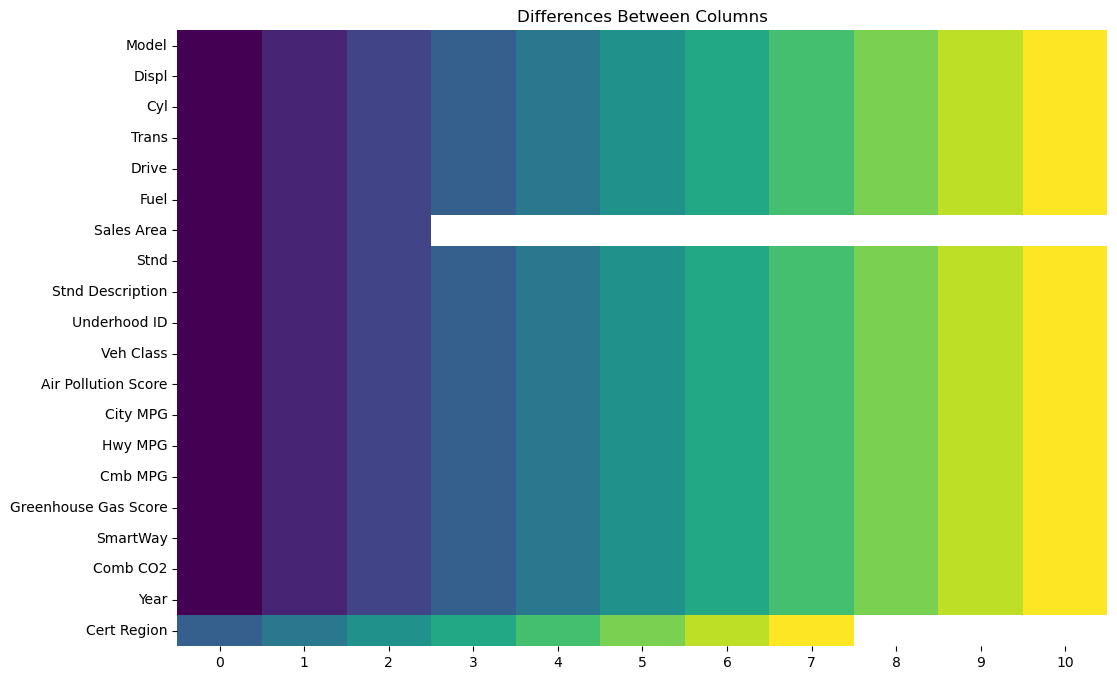

In [12]:
data_diff = pd.DataFrame.from_dict(unique_columns_dict, orient='index')

plt.figure(figsize=(12, 8))
sns.heatmap(data_diff, cmap='viridis', cbar=False)
plt.title('Differences Between Columns')
plt.show()

Pastebime stulpelių skirtumus 'Sales Area' (list[0, 1, 2]) ir 'Cert Region' (list[3, .., 10]). Pasitikriname kokius unikalius duomenis šiuose stulpeliuose turime.

In [13]:
def tikrinti_stulpeli_sarase(stulpelio_pavadinimas):
    col_ind = unique_columns_dict[stulpelio_pavadinimas]
    min_ind = min(col_ind)
    for i in range(min_ind, len(col_ind)):
        reiksmes = data_list[i][stulpelio_pavadinimas].unique().tolist()
        print(sorted(reiksmes))

In [14]:
tikrinti_stulpeli_sarase('Sales Area')

['CA', 'FA', 'FC']
['CA', 'FA', 'FC']
['CA', 'FA', 'FC']


In [15]:
tikrinti_stulpeli_sarase('Cert Region')

['CA', 'FA']
['CA', 'FA']
['CA', 'FA']
['CA', 'FA']
['CA', 'FA']


Matome, kad reikšmės to paties duomenų tipo ir formato, taigi, galime pirmųjų trijų data_list DataFrame stulpelių pavadinimus atnaujinti pagal daugumos pavadinimą 'Cert Region'.

In [16]:
unique_columns_dict['Sales Area']

[0, 1, 2]

In [17]:
for a in range(0,3):
    data_list[a].rename(columns={'Sales Area': 'Cert Region'}, inplace=True)
    print(data_list[a].columns.tolist())

['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2', 'Year']
['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2', 'Year']
['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region', 'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2', 'Year']


##
##
# 2. Duomenų paruošimas/apdorojimas
##
Dabar, kai duomenų stulpeliai suvienodinti, galima apjungti lenteles

In [18]:
data = pd.concat(data_list[0:11], ignore_index=True)

In [19]:
data

Model  Displ  Cyl       Trans Drive  \
0                   ACURA ILX    1.5  4.0       SCV-7   2WD   
1                   ACURA ILX    1.5  4.0       SCV-7   2WD   
2                   ACURA ILX    1.5  4.0       SCV-7   2WD   
3                   ACURA ILX    2.0  4.0  SemiAuto-5   2WD   
4                   ACURA ILX    2.0  4.0  SemiAuto-5   2WD   
...                       ...    ...  ...         ...   ...   
28611           VOLVO XC90 B5    2.0  4.0  SemiAuto-8   4WD   
28612           VOLVO XC90 B6    2.0  4.0  SemiAuto-8   4WD   
28613           VOLVO XC90 B6    2.0  4.0  SemiAuto-8   4WD   
28614  VOLVO XC90 T8 Recharge    2.0  4.0  SemiAuto-8   4WD   
28615  VOLVO XC90 T8 Recharge    2.0  4.0  SemiAuto-8   4WD   

                       Fuel Cert Region       Stnd  \
0                  Gasoline          FC         B3   
1                  Gasoline          FA         B2   
2                  Gasoline          CA       PZEV   
3                  Gasoline          FA         B5   
4                  Gasoline          CA         U2   
...                     ...         ...        ...   
28611              Gasoline          FA      T3B70   
28612              Gasoline          CA  L3SULEV30   
28613              Gasoline          FA      T3B30   
28614  Gasoline/Electricity          CA  L3SULEV30   
28615  Gasoline/Electricity          FA      T3B30   

                 Stnd Description  Underhood ID     Veh Class  \
0            Federal Tier 2 Bin 3  DHNXV01.5WF2     small car   
1            Federal Tier 2 Bin 2  DHNXV01.5YD2     small car   
2                 California PZEV  DHNXV01.5YD2     small car   
3            Federal Tier 2 Bin 5  DHNXV02.0CB2     small car   
4          California LEV-II ULEV  DHNXV02.0CB2     small car   
...                           ...           ...           ...   
28611       Federal Tier 3 Bin 70  PVVXJ02.0U70  standard SUV   
28612  California LEV-III SULEV30  PVVXJ02.0S30  standard SUV   
28613       Federal Tier 3 Bin 30  PVVXJ02.0S30  standard SUV   
28614  California LEV-III SULEV30  PVVXJ02.0P30  standard SUV   
28615       Federal Tier 3 Bin 30  PVVXJ02.0P30  standard SUV   

      Air Pollution Score City MPG Hwy MPG Cmb MPG Greenhouse Gas Score  \
0                       7       39      38      38                    9   
1                       8       39      38      38                    9   
2                       9       39      38      38                    9   
3                       5       24      35      28                    7   
4                       6       24      35      28                    7   
...                   ...      ...     ...     ...                  ...   
28611                   5       22      28      25                    5   
28612                   7       20      26      22                    5   
28613                   7       20      26      22                    5   
28614                   7    26/59   27/57   27/58                    9   
28615                   7    26/59   27/57   27/58                    9   

      SmartWay Comb CO2  Year  
0          Yes      228  2013  
1          Yes      228  2013  
2          Yes      228  2013  
3           No      318  2013  
4          Yes      318  2013  
...        ...      ...   ...  
28611       No      358  2023  
28612       No      401  2023  
28613       No      401  2023  
28614      Yes      137  2023  
28615      Yes      137  2023  

[28616 rows x 19 columns]

In [20]:
len(data)

28616

In [21]:
old_data = data

## 2.1. Prieš pradedant nagrinėti duomenis, reikia suprasti ką reiškia stulpelių antraštės. Naudojamės pateikta dokumentacija:

Model – vehicle make and model

Displ – engine displacement in liters

Cyl – number of engine cylinders

Trans – transmission type plus number of gears

Drive – 2-wheel Drive, 4-wheel drive/all-wheel drive

Fuel – fuel(s)

Cert Region – CA (California, pažangiausia), FA (vidutiniška-optimali, Federal All Altitude), FC (atlaidžiausia, Tier 2 Federal + California).

Stnd – vehicle emissions standard code. See Stnd Description. 

Stnd Description – vehicle emissions standard description

Underhood ID – engine family or test group ID (The vehicles have different emissions configurations)

Veh Class – EPA (Environmental Protection Agency) vehicle class (by size)

Air Pollution Score (Smog Rating) - represents the amount of health-damaging and smog-forming airborne pollutants the vehicle emits. Scoring ranges from 1 (worst) to 10 (best). 

City MPG – city fuel economy in miles per gallon

Hwy MPG – highway fuel economy in miles per gallon

Cmb MPG – combined city/highway fuel economy in miles per gallon

Greenhouse Gas Score (Greenhouse Gas Rating) - (primarily CO2) gases that contribute to climate change.

SmartWay – Yes, No, or Elite (To earn the SmartWay designation, a vehicle must receive a combined score from both scales that is much better than the average vehicle. SmartWay Elite certification is given to only those vehicles that attain the highest scores on both scales. SmartWay Elite vehicles are the very best environmental performers.)

Comb CO2 – combined city/highway CO2 tailpipe emissions in grams per mile.

## 2.2. NaN reikšmės
Dabar galima peržvelgti atvejus kuomet informacija nenurodyta (NaN).

In [22]:
data[data.isna().any(axis=1)]

Model  Displ  Cyl   Trans Drive         Fuel  \
428    CHEVROLET Cab Chassis 35    6.6  8.0  Auto-6   4WD       Diesel   
429    CHEVROLET Cab Chassis 35    6.6  8.0  Auto-6   4WD       Diesel   
430    CHEVROLET Cab Chassis 35    6.6  8.0  Auto-6   2WD       Diesel   
431    CHEVROLET Cab Chassis 35    6.6  8.0  Auto-6   2WD       Diesel   
481      CHEVROLET Express 2500    6.0  8.0  Auto-6   2WD  Ethanol/Gas   
...                         ...    ...  ...     ...   ...          ...   
28562         VOLKSWAGEN ID.4 S    NaN  NaN  Auto-1   2WD  Electricity   
28578   VOLVO C40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   
28579   VOLVO C40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   
28600  VOLVO XC40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   
28601  VOLVO XC40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   

      Cert Region  Stnd                                   Stnd Description  \
428            FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
429            CA    U2                             California LEV-II ULEV   
430            FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
431            CA    U2                             California LEV-II ULEV   
481            FC    B8                               Federal Tier 2 Bin 8   
...           ...   ...                                                ...   
28562          CA   ZEV                                     California ZEV   
28578          FA  T3B0                               Federal Tier 3 Bin 0   
28579          CA   ZEV                                     California ZEV   
28600          FA  T3B0                               Federal Tier 3 Bin 0   
28601          CA   ZEV                                     California ZEV   

       Underhood ID  Veh Class Air Pollution Score City MPG Hwy MPG Cmb MPG  \
428    DGMXD06.6365     pickup                   1      NaN     NaN     NaN   
429    DGMXD06.6365     pickup                   1      NaN     NaN     NaN   
430    DGMXD06.6365     pickup                   1      NaN     NaN     NaN   
431    DGMXD06.6365     pickup                   1      NaN     NaN     NaN   
481    DGMXT06.0396        van                   2      NaN     NaN     NaN   
...             ...        ...                 ...      ...     ...     ...   
28562  PVGAT00.0VZR  small SUV                  10      115      99     107   
28578  PVVXV00.0Z0A  small SUV                  10       94      80      87   
28579  PVVXV00.0Z0A  small SUV                  10       94      80      87   
28600  PVVXV00.0Z0A  small SUV                  10       92      79      85   
28601  PVVXV00.0Z0A  small SUV                  10       92      79      85   

      Greenhouse Gas Score SmartWay Comb CO2  Year  
428                    NaN       No      NaN  2013  
429                    NaN       No      NaN  2013  
430                    NaN       No      NaN  2013  
431                    NaN       No      NaN  2013  
481                    NaN       No      NaN  2013  
...                    ...      ...      ...   ...  
28562                   10    Elite        0  2023  
28578                   10    Elite        0  2023  
28579                   10    Elite        0  2023  
28600                   10    Elite        0  2023  
28601                   10    Elite        0  2023  

[1744 rows x 19 columns]

## NaN engines

Pirmiausia pastebime, jog kai kurie automobiliai neturi nurodytų variklio parametrų (Displ: NaN, Cyl: NaN). Pasitikriname kokiais atvejais stulpeliuose (Displ, Cyl) nurodytos NaN reikšmės. Pradėsime nuo kuro tipo. Pasitikriname kokias unikalias reikšmes turime:

In [23]:
data['Fuel'].unique()

array(['Gasoline', 'Diesel', 'Ethanol/Gas', 'Gasoline/Electricity',
       'Electricity', 'CNG', 'CNG/Gasoline', 'Gasoline/Electricty',
       'Hydrogen', 'Ethanol'], dtype=object)

Pataisome netaisyklingai įrašytą stulpelio antraštę 'Gasoline/Electricty'

In [24]:
data['Fuel'] = data['Fuel'].replace('Gasoline/Electricty','Gasoline/Electricity')

In [25]:
data['Fuel'].unique()

array(['Gasoline', 'Diesel', 'Ethanol/Gas', 'Gasoline/Electricity',
       'Electricity', 'CNG', 'CNG/Gasoline', 'Hydrogen', 'Ethanol'],
      dtype=object)

Tada pareiname prie NaN tikrinimo:

In [26]:
NaN_ICE_engine = data[data[['Displ', 'Cyl']].isna().all(axis=1)]
NaN_ICE_engine

Model  Displ  Cyl   Trans Drive         Fuel  \
581                   CODA Coda    NaN  NaN  Auto-1   2WD  Electricity   
582                   CODA Coda    NaN  NaN  Auto-1   2WD  Electricity   
656                   FIAT 500e    NaN  NaN  Auto-1   2WD  Electricity   
657                   FIAT 500e    NaN  NaN  Auto-1   2WD  Electricity   
787              FORD Focus BEV    NaN  NaN  Auto-1   2WD  Electricity   
...                         ...    ...  ...     ...   ...          ...   
28562         VOLKSWAGEN ID.4 S    NaN  NaN  Auto-1   2WD  Electricity   
28578   VOLVO C40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   
28579   VOLVO C40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   
28600  VOLVO XC40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   
28601  VOLVO XC40 Recharge twin    NaN  NaN  Auto-1   4WD  Electricity   

      Cert Region  Stnd      Stnd Description  Underhood ID  Veh Class  \
581            FA    B1  Federal Tier 2 Bin 1  DCDAV00.01UA  small car   
582            CA   ZEV        California ZEV  DCDAV00.01UA  small car   
656            FA    B1  Federal Tier 2 Bin 1  DCRXV00.00PR  small car   
657            CA   ZEV        California ZEV  DCRXV00.00PR  small car   
787            FA    B1  Federal Tier 2 Bin 1  DFMXV00.0VAE  small car   
...           ...   ...                   ...           ...        ...   
28562          CA   ZEV        California ZEV  PVGAT00.0VZR  small SUV   
28578          FA  T3B0  Federal Tier 3 Bin 0  PVVXV00.0Z0A  small SUV   
28579          CA   ZEV        California ZEV  PVVXV00.0Z0A  small SUV   
28600          FA  T3B0  Federal Tier 3 Bin 0  PVVXV00.0Z0A  small SUV   
28601          CA   ZEV        California ZEV  PVVXV00.0Z0A  small SUV   

      Air Pollution Score City MPG Hwy MPG Cmb MPG Greenhouse Gas Score  \
581                    10       77      68      73                   10   
582                    10       77      68      73                   10   
656                    10      122     108     116                   10   
657                    10      122     108     116                   10   
787                    10      110      99     105                   10   
...                   ...      ...     ...     ...                  ...   
28562                  10      115      99     107                   10   
28578                  10       94      80      87                   10   
28579                  10       94      80      87                   10   
28600                  10       92      79      85                   10   
28601                  10       92      79      85                   10   

      SmartWay Comb CO2  Year  
581      Elite        0  2013  
582      Elite        0  2013  
656      Elite        0  2013  
657      Elite        0  2013  
787      Elite        0  2013  
...        ...      ...   ...  
28562    Elite        0  2023  
28578    Elite        0  2023  
28579    Elite        0  2023  
28600    Elite        0  2023  
28601    Elite        0  2023  

[1112 rows x 19 columns]

Remiantis žiniomis apie automobilius, NaN reikšmės turėtų būti nurodomos prie automobilių, kurie neturi vidaus degimo variklių (ICE, Internal Combustion Engine). Patikriname šią hipotezę:

In [27]:
NaN_ICE_engine['Fuel'].unique()

array(['Electricity', 'Hydrogen'], dtype=object)

Gauname, jog tokie automobiliai varomi arba elektra, arba vandeniliu. Pastarasis priskiriamas elektra varomų automobilių tipui, kadangi naudoja kitą principą nei vidaus degimo varikliai bei savo veikimo metu gamina būtent elektrą.

Šias (NaN) reikšmes galime pasikeisti suprantamesnėmis – kurios pabrėžtų jog automobilis varomas elektra (EV). Taigi užpildome originaliąją lentelę:

In [28]:
data[['Displ', 'Cyl']] = data[['Displ', 'Cyl']].fillna('EV')

In [29]:
data[['Displ', 'Cyl']].notna().count()

Displ    28616
Cyl      28616
dtype: int64

In [30]:
data[data[['Displ', 'Cyl']].isna().all(axis=1)]

Empty DataFrame
Columns: [Model, Displ, Cyl, Trans, Drive, Fuel, Cert Region, Stnd, Stnd Description, Underhood ID, Veh Class, Air Pollution Score, City MPG, Hwy MPG, Cmb MPG, Greenhouse Gas Score, SmartWay, Comb CO2, Year]
Index: []

## Patikriname kur yra likusios NaN reikšmės:

In [31]:
data[data.isna().any(axis=1)]

Model Displ  Cyl      Trans Drive         Fuel  \
428   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   4WD       Diesel   
429   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   4WD       Diesel   
430   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   2WD       Diesel   
431   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   2WD       Diesel   
481     CHEVROLET Express 2500   6.0  8.0     Auto-6   2WD  Ethanol/Gas   
...                        ...   ...  ...        ...   ...          ...   
7213        RAM Promaster 3500   3.0  4.0  AutoMan-6   2WD       Diesel   
7214        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   
7215        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   
7216        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   
7217        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   

     Cert Region  Stnd                                   Stnd Description  \
428           FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
429           CA    U2                             California LEV-II ULEV   
430           FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
431           CA    U2                             California LEV-II ULEV   
481           FC    B8                               Federal Tier 2 Bin 8   
...          ...   ...                                                ...   
7213          CA    U2                             California LEV-II ULEV   
7214          FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
7215          FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
7216          CA    U2                             California LEV-II ULEV   
7217          CA    U2                             California LEV-II ULEV   

      Underhood ID        Veh Class Air Pollution Score City MPG Hwy MPG  \
428   DGMXD06.6365           pickup                   1      NaN     NaN   
429   DGMXD06.6365           pickup                   1      NaN     NaN   
430   DGMXD06.6365           pickup                   1      NaN     NaN   
431   DGMXD06.6365           pickup                   1      NaN     NaN   
481   DGMXT06.0396              van                   2      NaN     NaN   
...            ...              ...                 ...      ...     ...   
7213  FCRXD03.05VV  special purpose                   1      NaN     NaN   
7214  FCRXD03.65V0              van                   1      NaN     NaN   
7215  FCRXD03.65V0  special purpose                   1      NaN     NaN   
7216  FCRXD03.65V0              van                   1      NaN     NaN   
7217  FCRXD03.65V0  special purpose                   1      NaN     NaN   

     Cmb MPG Greenhouse Gas Score SmartWay Comb CO2  Year  
428      NaN                  NaN       No      NaN  2013  
429      NaN                  NaN       No      NaN  2013  
430      NaN                  NaN       No      NaN  2013  
431      NaN                  NaN       No      NaN  2013  
481      NaN                  NaN       No      NaN  2013  
...      ...                  ...      ...      ...   ...  
7213     NaN                  NaN       No      NaN  2015  
7214     NaN                  NaN       No      NaN  2015  
7215     NaN                  NaN       No      NaN  2015  
7216     NaN                  NaN       No      NaN  2015  
7217     NaN                  NaN       No      NaN  2015  

[632 rows x 19 columns]

Matome, kad nėra jokių duomenų apie šių automobilių taršą ir kuro sąnaudas. Atkreipę dėmesį į šių automobilių modifikacijas galime rasti atsakymą.

In [32]:
NaN_info = data[data.isna().any(axis=1)]
len(NaN_info[['Displ', 'Cyl', 'Fuel', 'Veh Class']])

632

In [33]:
spec_cars_info = NaN_info[['Displ', 'Cyl', 'Fuel', 'Veh Class']].apply(lambda x: x.unique())

In [34]:
spec_cars_info

Displ        [6.6, 6.0, 4.6, 5.4, 6.8, 6.7, 6.2, 3.0, 4.0, ...
Cyl                                 [8.0, 10.0, 6.0, 4.0, 5.0]
Fuel             [Diesel, Ethanol/Gas, Gasoline, CNG/Gasoline]
Veh Class         [pickup, van, standard SUV, special purpose]
dtype: object

In [35]:
type(spec_cars_info)

pandas.core.series.Series

Išrūšiuojame:

In [36]:
spec_cars_info = spec_cars_info.apply(lambda y: sorted(y))
spec_cars_info

Displ        [3.0, 3.2, 3.5, 3.6, 3.7, 4.0, 4.6, 5.4, 5.6, ...
Cyl                                 [4.0, 5.0, 6.0, 8.0, 10.0]
Fuel             [CNG/Gasoline, Diesel, Ethanol/Gas, Gasoline]
Veh Class         [pickup, special purpose, standard SUV, van]
dtype: object

In [37]:
NaN_info.groupby('Fuel')['Fuel'].count()

Fuel
CNG/Gasoline      6
Diesel          326
Ethanol/Gas     120
Gasoline        180
Name: Fuel, dtype: int64

In [38]:
NaN_info.groupby('Displ')['Displ'].count()

Displ
3.0    100
3.2     21
3.5     13
3.6     18
3.7     22
4.0     18
4.6      7
5.4     17
5.6     19
5.7     72
6.0     84
6.2     24
6.4      8
6.6     72
6.7    133
6.8      4
Name: Displ, dtype: int64

In [39]:
NaN_info.groupby('Cyl')['Cyl'].count()

Cyl
4.0      28
5.0      21
6.0     203
8.0     376
10.0      4
Name: Cyl, dtype: int64

In [40]:
NaN_info.groupby('Veh Class')['Veh Class'].count()

Veh Class
pickup             246
special purpose    160
standard SUV        16
van                210
Name: Veh Class, dtype: int64

Geriau šiems kiekiams atvaizduoti nubrėžiame grafiką

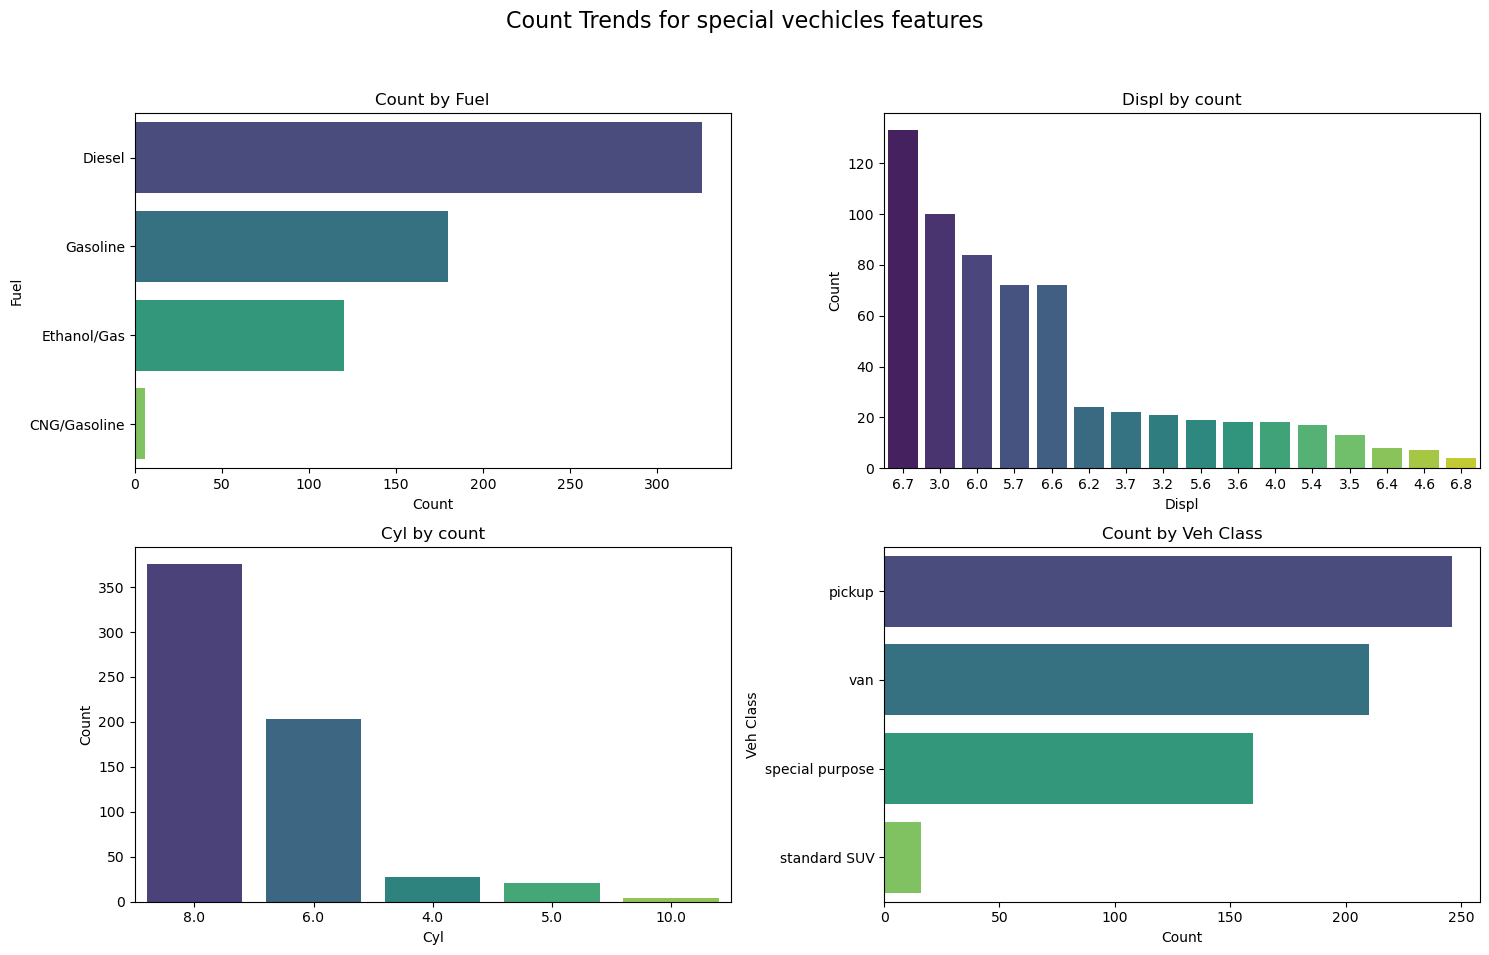

In [41]:
columns_to_plot = ['Fuel', 'Displ', 'Cyl', 'Veh Class']

# Grafikų grafike formatavimas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Count Trends for special vechicles features', fontsize=16)

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)
    
    # Grupavimo ir agregavimo veiksmas pasirinktam stulpeliui
    counts = NaN_info.groupby(column)[column].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
        
    
    # Grafikų piešimas
    if column in ['Displ', 'Cyl']:
        counts = counts.set_index(column).T
        sns.barplot(data=counts, ax=axes[row, col], palette="viridis")
    else:
        sns.barplot(x='count', y=column, data=counts.reset_index(), ax=axes[row, col], palette="viridis")
    
    if column in ['Displ', 'Cyl']:
        axes[row, col].set_title(f'{column} by count')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Count')
    else:
        axes[row, col].set_title(f'Count by {column}')
        axes[row, col].set_xlabel('Count')
        axes[row, col].set_ylabel(column)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Galime matyti, jog gaunamos reikšmės, kai variklio litražas yra didesnis, turi daugiau cilindrų, o taip pat dominuoja dyzelino kuro rūšis – pagarsėjusi kaip taršiausia. Tačiau dyzelininiai varikliai taip pat turi didesnį sukimo momentą, todėl gali sugeneruoti daugiau galios nei tokio pat dydžio kito kuro tipo vidaus degimo variklis. Taipogi pagal automobilių klases matome, jog yra išskiriamos transportavimo ir spec. paskirties kategorijos.

Taigi, galime teigti kad šie automobiliai yra specialiosios paskirties, todėl lentelėje nurodytais standartais greičiausiai nebuvo atlikti matavimai.

Kadangi neturime pačių svarbiausių duomenų, negalime atlikti analizės. Dėl to šias eilutes pašaliname iš duomenų rinkinio.

In [42]:
data[data.isna().any(axis=1)]

Model Displ  Cyl      Trans Drive         Fuel  \
428   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   4WD       Diesel   
429   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   4WD       Diesel   
430   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   2WD       Diesel   
431   CHEVROLET Cab Chassis 35   6.6  8.0     Auto-6   2WD       Diesel   
481     CHEVROLET Express 2500   6.0  8.0     Auto-6   2WD  Ethanol/Gas   
...                        ...   ...  ...        ...   ...          ...   
7213        RAM Promaster 3500   3.0  4.0  AutoMan-6   2WD       Diesel   
7214        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   
7215        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   
7216        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   
7217        RAM Promaster 3500   3.6  6.0     Auto-6   2WD     Gasoline   

     Cert Region  Stnd                                   Stnd Description  \
428           FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
429           CA    U2                             California LEV-II ULEV   
430           FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
431           CA    U2                             California LEV-II ULEV   
481           FC    B8                               Federal Tier 2 Bin 8   
...          ...   ...                                                ...   
7213          CA    U2                             California LEV-II ULEV   
7214          FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
7215          FA  HDV1  HDV1 (Federal HD chassis Class 2b GVW 8501-10000)   
7216          CA    U2                             California LEV-II ULEV   
7217          CA    U2                             California LEV-II ULEV   

      Underhood ID        Veh Class Air Pollution Score City MPG Hwy MPG  \
428   DGMXD06.6365           pickup                   1      NaN     NaN   
429   DGMXD06.6365           pickup                   1      NaN     NaN   
430   DGMXD06.6365           pickup                   1      NaN     NaN   
431   DGMXD06.6365           pickup                   1      NaN     NaN   
481   DGMXT06.0396              van                   2      NaN     NaN   
...            ...              ...                 ...      ...     ...   
7213  FCRXD03.05VV  special purpose                   1      NaN     NaN   
7214  FCRXD03.65V0              van                   1      NaN     NaN   
7215  FCRXD03.65V0  special purpose                   1      NaN     NaN   
7216  FCRXD03.65V0              van                   1      NaN     NaN   
7217  FCRXD03.65V0  special purpose                   1      NaN     NaN   

     Cmb MPG Greenhouse Gas Score SmartWay Comb CO2  Year  
428      NaN                  NaN       No      NaN  2013  
429      NaN                  NaN       No      NaN  2013  
430      NaN                  NaN       No      NaN  2013  
431      NaN                  NaN       No      NaN  2013  
481      NaN                  NaN       No      NaN  2013  
...      ...                  ...      ...      ...   ...  
7213     NaN                  NaN       No      NaN  2015  
7214     NaN                  NaN       No      NaN  2015  
7215     NaN                  NaN       No      NaN  2015  
7216     NaN                  NaN       No      NaN  2015  
7217     NaN                  NaN       No      NaN  2015  

[632 rows x 19 columns]

In [43]:
data = data.dropna(axis=0).reset_index(drop=True)

In [44]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [Model, Displ, Cyl, Trans, Drive, Fuel, Cert Region, Stnd, Stnd Description, Underhood ID, Veh Class, Air Pollution Score, City MPG, Hwy MPG, Cmb MPG, Greenhouse Gas Score, SmartWay, Comb CO2, Year]
Index: []

In [45]:
len(data)

27984

Pasitikriname skirtumą tarp senųjų duomenų skaičiaus bei naujųjų (su išmestomis likusiomis NaN eilutėmis)

In [46]:
print(len(old_data) - len(data))

632


##
## 2.3. Kuro sąnaudos
Toliau, turime nepatogumą – kuro sąnaudų išraiška mpg

In [47]:
data[['City MPG', 'Hwy MPG', 'Cmb MPG']]

City MPG Hwy MPG Cmb MPG
0           39      38      38
1           39      38      38
2           39      38      38
3           24      35      28
4           24      35      28
...        ...     ...     ...
27979       22      28      25
27980       20      26      22
27981       20      26      22
27982    26/59   27/57   27/58
27983    26/59   27/57   27/58

[27984 rows x 3 columns]

Kadangi duomenys paimti iš amerikietiško šaltinio, matome jog degalų sąnaudos atvaizduojamos myliomis per galoną degalų. Kadangi esame įpratę naudotis tarptautine matų sistema, šiuos dydžius konvertuojame į litrus per kilometrus.

Formulė:

<i>(L / 100 km) = 235.215 / (mpg)</i>

O kadangi konvertuosime visus tris stulpelius galima taikyti funkciją.

In [48]:
def konvertavimas(mpg):
    if '/' in str(mpg): # Reikia patikrinti ar mpg string formoje yra naudojamas nurodytas simbolis
        num, denom = map(float, mpg.split('/')) # Tokiu atveju išsaugomos abi reikšmės
        return f"{round(235.215 / num, 2)}/{round(235.215 / denom, 2)}" # Ir abi įrašomos atsakyme
    else:
        return round((235.215 / float(mpg)), 2) # Jeigu reikšmė be simbolio, atlikti su vienu skaičiumi

In [49]:
mpg_stulpeliai = ['City MPG', 'Hwy MPG', 'Cmb MPG']
mpg_stulpeliai

['City MPG', 'Hwy MPG', 'Cmb MPG']

In [50]:
for stulp in mpg_stulpeliai:
    data[stulp] = data[stulp].apply(konvertavimas) # Kiekvienam mpg stulpeliui pritaikome funkciją

Tada belieka pervadinti stulpelius:

In [51]:
data.rename(columns={stulp: stulp.replace('MPG', 'L/100km') for stulp in mpg_stulpeliai}, inplace=True)

In [52]:
data.head(1)

Model Displ  Cyl  Trans Drive      Fuel Cert Region Stnd  \
0  ACURA ILX   1.5  4.0  SCV-7   2WD  Gasoline          FC   B3   

       Stnd Description  Underhood ID  Veh Class Air Pollution Score  \
0  Federal Tier 2 Bin 3  DHNXV01.5WF2  small car                   7   

  City L/100km Hwy L/100km Cmb L/100km Greenhouse Gas Score SmartWay Comb CO2  \
0         6.03        6.19        6.19                    9      Yes      228   

   Year  
0  2013

### Hibridinės reikšmės
Dirbant su lentele pastebėjome, jog yra hibridinių transporto priemonių. Dėl šios priežasties kuro sąnaudose buvo nurodytos 2 vertės kiekvienam kuro tipui. Tačiau hibridinės transporto priemonės nėra pritaikytos veikti tik alternatyviuoju kuru, o priešingai – kuo efektyviau išnaudoti abi galimas eigas.

Dėl šios priežasties raskime visas eilutes, kurių reikšmės atskirtos simboliu "/" , o radę skaitines, išveskime jų vidurkį ir įrašykime į lentelę.

In [53]:
skaitiniai_stulpeliai = ['City L/100km', 'Hwy L/100km', 'Cmb L/100km', 'Comb CO2']

In [54]:
def apvalinimas(skait_stulp):
    if '/' in str(skait_stulp): # Reikia patikrinti ar string formoje yra naudojamas nurodytas simbolis
        num, denom = map(float, skait_stulp.split('/')) # Tokiu atveju išsaugomos abi reikšmės
        return round((num + denom) / 2, 2) # Ir randamas jų vidurkis
    else:
        return float(skait_stulp) # Jeigu reikšmė be simbolio tiesiog grąžinti skaičių

In [55]:
for stulpelis in skaitiniai_stulpeliai:
    data[stulpelis] = data[stulpelis].apply(apvalinimas) # Kiekvienam mpg stulpeliui pritaikome funkciją

##
##
# 3. Duomenų analizė
##
Taigi, galima pradėti analizę. Turime labai daug skirtingų automobilių modelių, skirtingomis techninėmis charakteriskomis. Turint šiek tiek žinių apie automobilius galima kelti tokias hipotezes.

### Automobilis bus mažiau taršus jeigu:

<ol style="list-style: upper-alpha;">
    <li>Automobilis naujesnis</li>
    <li>Jo kuro sąnaudos mažesnės</li>
    <li>Apsiribos 2 varančiaisiais ratais</li>
    <li>Turės mažesnį variklį (mažesnis litražas)</li>
    <li>Bus varomas elektra arba hibridiniu varikliu</li>
</ol>

##
##

In [56]:
data.head(5)

Model Displ  Cyl       Trans Drive      Fuel Cert Region  Stnd  \
0  ACURA ILX   1.5  4.0       SCV-7   2WD  Gasoline          FC    B3   
1  ACURA ILX   1.5  4.0       SCV-7   2WD  Gasoline          FA    B2   
2  ACURA ILX   1.5  4.0       SCV-7   2WD  Gasoline          CA  PZEV   
3  ACURA ILX   2.0  4.0  SemiAuto-5   2WD  Gasoline          FA    B5   
4  ACURA ILX   2.0  4.0  SemiAuto-5   2WD  Gasoline          CA    U2   

         Stnd Description  Underhood ID  Veh Class Air Pollution Score  \
0    Federal Tier 2 Bin 3  DHNXV01.5WF2  small car                   7   
1    Federal Tier 2 Bin 2  DHNXV01.5YD2  small car                   8   
2         California PZEV  DHNXV01.5YD2  small car                   9   
3    Federal Tier 2 Bin 5  DHNXV02.0CB2  small car                   5   
4  California LEV-II ULEV  DHNXV02.0CB2  small car                   6   

   City L/100km  Hwy L/100km  Cmb L/100km Greenhouse Gas Score SmartWay  \
0          6.03         6.19         6.19                    9      Yes   
1          6.03         6.19         6.19                    9      Yes   
2          6.03         6.19         6.19                    9      Yes   
3          9.80         6.72         8.40                    7       No   
4          9.80         6.72         8.40                    7      Yes   

   Comb CO2  Year  
0     228.0  2013  
1     228.0  2013  
2     228.0  2013  
3     318.0  2013  
4     318.0  2013

###
###
### 3.1. Tikriname hipotezes(1):
##### A. Automobilis bus mažiau taršus jeigu bus naujesnis
###

In [57]:
data

Model Displ  Cyl       Trans Drive  \
0                   ACURA ILX   1.5  4.0       SCV-7   2WD   
1                   ACURA ILX   1.5  4.0       SCV-7   2WD   
2                   ACURA ILX   1.5  4.0       SCV-7   2WD   
3                   ACURA ILX   2.0  4.0  SemiAuto-5   2WD   
4                   ACURA ILX   2.0  4.0  SemiAuto-5   2WD   
...                       ...   ...  ...         ...   ...   
27979           VOLVO XC90 B5   2.0  4.0  SemiAuto-8   4WD   
27980           VOLVO XC90 B6   2.0  4.0  SemiAuto-8   4WD   
27981           VOLVO XC90 B6   2.0  4.0  SemiAuto-8   4WD   
27982  VOLVO XC90 T8 Recharge   2.0  4.0  SemiAuto-8   4WD   
27983  VOLVO XC90 T8 Recharge   2.0  4.0  SemiAuto-8   4WD   

                       Fuel Cert Region       Stnd  \
0                  Gasoline          FC         B3   
1                  Gasoline          FA         B2   
2                  Gasoline          CA       PZEV   
3                  Gasoline          FA         B5   
4                  Gasoline          CA         U2   
...                     ...         ...        ...   
27979              Gasoline          FA      T3B70   
27980              Gasoline          CA  L3SULEV30   
27981              Gasoline          FA      T3B30   
27982  Gasoline/Electricity          CA  L3SULEV30   
27983  Gasoline/Electricity          FA      T3B30   

                 Stnd Description  Underhood ID     Veh Class  \
0            Federal Tier 2 Bin 3  DHNXV01.5WF2     small car   
1            Federal Tier 2 Bin 2  DHNXV01.5YD2     small car   
2                 California PZEV  DHNXV01.5YD2     small car   
3            Federal Tier 2 Bin 5  DHNXV02.0CB2     small car   
4          California LEV-II ULEV  DHNXV02.0CB2     small car   
...                           ...           ...           ...   
27979       Federal Tier 3 Bin 70  PVVXJ02.0U70  standard SUV   
27980  California LEV-III SULEV30  PVVXJ02.0S30  standard SUV   
27981       Federal Tier 3 Bin 30  PVVXJ02.0S30  standard SUV   
27982  California LEV-III SULEV30  PVVXJ02.0P30  standard SUV   
27983       Federal Tier 3 Bin 30  PVVXJ02.0P30  standard SUV   

      Air Pollution Score  City L/100km  Hwy L/100km  Cmb L/100km  \
0                       7          6.03         6.19         6.19   
1                       8          6.03         6.19         6.19   
2                       9          6.03         6.19         6.19   
3                       5          9.80         6.72         8.40   
4                       6          9.80         6.72         8.40   
...                   ...           ...          ...          ...   
27979                   5         10.69         8.40         9.41   
27980                   7         11.76         9.05        10.69   
27981                   7         11.76         9.05        10.69   
27982                   7          6.52         6.42         6.38   
27983                   7          6.52         6.42         6.38   

      Greenhouse Gas Score SmartWay  Comb CO2  Year  
0                        9      Yes     228.0  2013  
1                        9      Yes     228.0  2013  
2                        9      Yes     228.0  2013  
3                        7       No     318.0  2013  
4                        7      Yes     318.0  2013  
...                    ...      ...       ...   ...  
27979                    5       No     358.0  2023  
27980                    5       No     401.0  2023  
27981                    5       No     401.0  2023  
27982                    9      Yes     137.0  2023  
27983                    9      Yes     137.0  2023  

[27984 rows x 19 columns]

In [58]:
co2_mean_by_year = data.groupby('Year')['Comb CO2'].mean().reset_index()
co2_mean_by_year

Year    Comb CO2
0   2013  409.226233
1   2014  402.107974
2   2015  394.672327
3   2016  386.478756
4   2017  387.651796
5   2018  386.508846
6   2019  383.102974
7   2020  384.645580
8   2021  383.841841
9   2022  374.259992
10  2023  348.243542

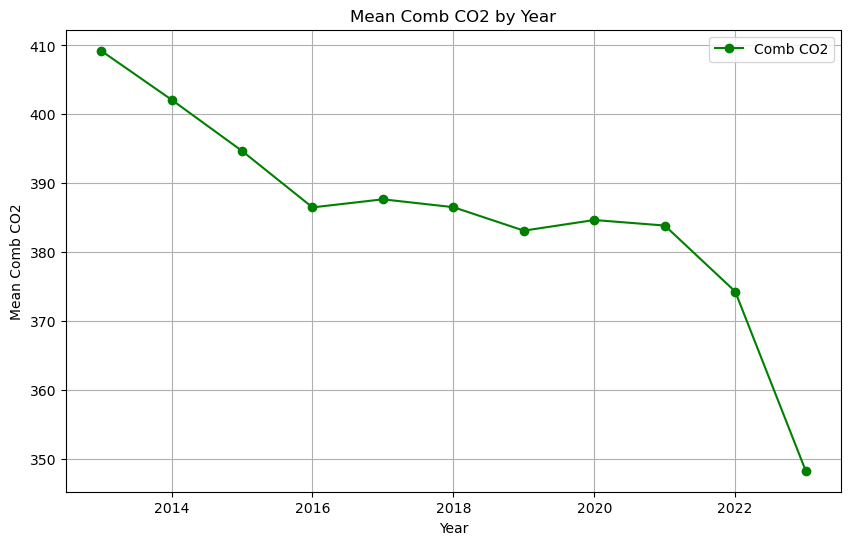

In [59]:
co2_mean_by_year.plot(x='Year', y='Comb CO2', kind='line', marker='o', linestyle='-', color='g', figsize=(10, 6))
plt.title('Mean Comb CO2 by Year')
plt.xlabel('Year')
plt.ylabel('Mean Comb CO2')
plt.grid(True)
plt.show()

Grafike matome taršos vidurkius kiekvienais metais. Matome, jog sąstingis 2017 - 2021 metais, kuris galėjo būti nulemtas didesnės imties taršesnių automobilių modelių ar modifikacijų. Išskyrus šį sąstingį, pastebima aiški mažėjanti CO2 tendencija kiekvienais metais. O taip pat, net jei palygintume naujesnius automobilius su senesniais, daugeliu atvejų gauname mažesnį taršumą. 

Tad galime teigti jog naujesni automobiliai yra mažiau taršūs.

###
###
### 3.2. Tikriname hipotezes(2):
##### B. Automobilis bus mažiau taršus jeigu jo kuro sąnaudos mažesnės
###
###

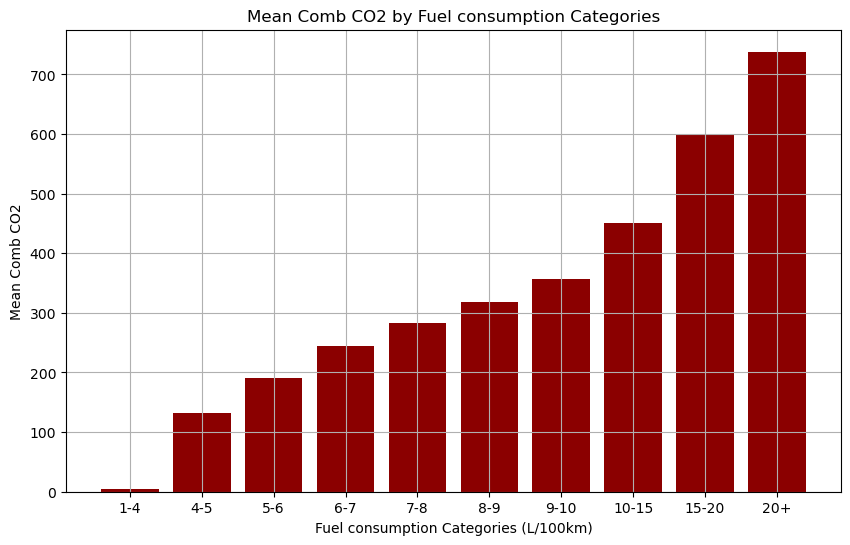

In [60]:
bins = [1, 4, 5, 6, 7, 8, 9, 10, 15, 20, float('inf')]
labels = ['1-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-15', '15-20', '20+']

# Nauja lentelė su sąnaudų grupėmis ir CO2 reikšmėmis
categorized_data = pd.DataFrame()
categorized_data['Cmb Category'] = pd.cut(data['Cmb L/100km'], bins=bins, labels=labels, right=False)
categorized_data['Comb CO2'] = data['Comb CO2']

# Grupavimas
grouped_data = categorized_data.groupby('Cmb Category')['Comb CO2'].mean().reset_index()

# Grafiko piešimas
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Cmb Category'], grouped_data['Comb CO2'], color='darkred')
plt.title('Mean Comb CO2 by Fuel consumption Categories')
plt.xlabel('Fuel consumption Categories (L/100km)')
plt.ylabel('Mean Comb CO2')
plt.grid(True)
plt.show()

Be išimties, matome, jog išmetamų teršalų kiekis tiesiogiai priklauso nuo kuro sąnaudų.

Tad automobilis mažiau taršus jeigu jo kuro sąnaudos mažesnės.

###
###
### 3.3. Tikriname hipotezes(3):
##### C. Automobilis bus mažiau taršus jeigu apsiribos 2 varančiaisias ratais
###
###

In [61]:
data['Drive'].unique()

array(['2WD', '4WD'], dtype=object)

In [62]:
data.groupby('Drive')['Comb CO2'].mean()

Drive
2WD    367.552686
4WD    406.145785
Name: Comb CO2, dtype: float64

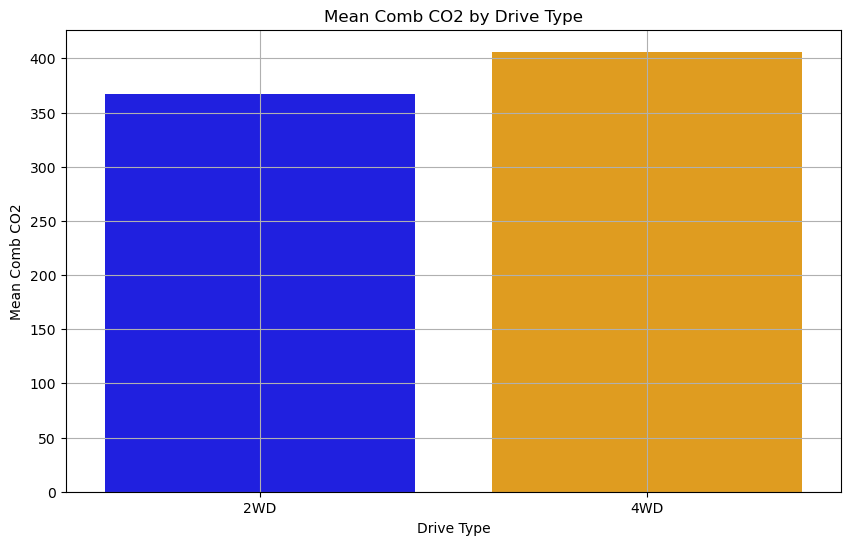

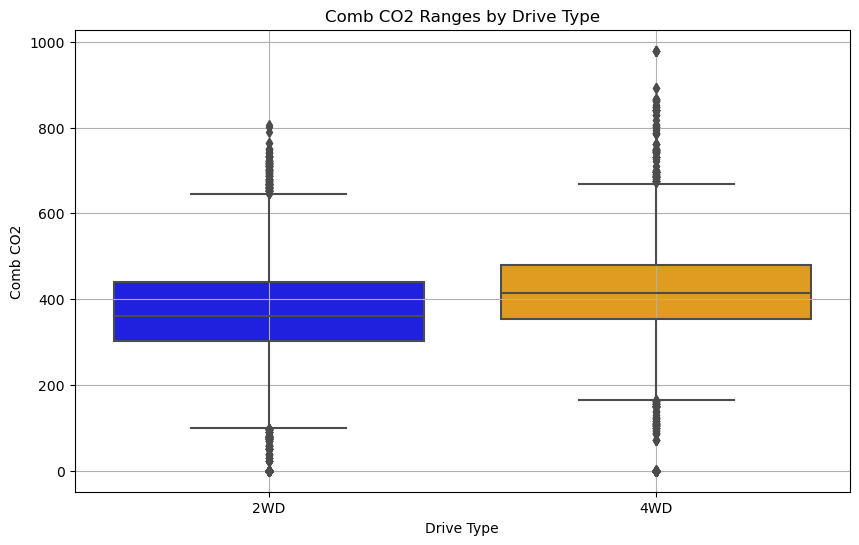

In [63]:
mean_comb_co2_by_drive = data.groupby('Drive')['Comb CO2'].mean().reset_index()

# CO2 vidurkio histograma
plt.figure(figsize=(10, 6))
sns.barplot(x='Drive', y='Comb CO2', data=mean_comb_co2_by_drive, palette=['blue', 'orange'])
plt.title('Mean Comb CO2 by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Mean Comb CO2')
plt.grid(True)
plt.show()

# Vidurkio ir ribinių reikšmių diagrama
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drive', y='Comb CO2', data=data, palette=['blue', 'orange'])
plt.title('Comb CO2 Ranges by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Comb CO2')
plt.grid(True)
plt.show()

Rezultate gauname, kad automobilis 2 varančiaisiais ratais turi šiek tiek mažesnį CO2 išmetimų vidurkį. Taip pat, šiek tiek glaudesnį žemesniam išmetimų skaičiui pasiskirstymą.

Pasiskirstymą galime apžvelgti dar intuityviau kitu grafiku.

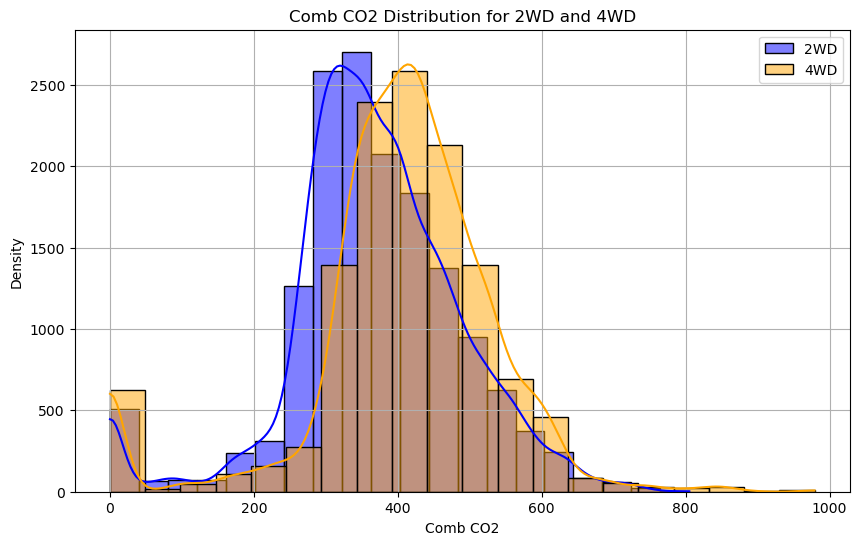

In [64]:
plt.figure(figsize=(10, 6))

# Grafikų kūrimas
sns.histplot(data[data['Drive'] == '2WD']['Comb CO2'], kde=True, label='2WD', color='blue', bins=20)
sns.histplot(data[data['Drive'] == '4WD']['Comb CO2'], kde=True, label='4WD', color='orange', bins=20)

plt.title('Comb CO2 Distribution for 2WD and 4WD')
plt.xlabel('Comb CO2')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Šiame grafike kur kas vizualiau matosi 2WD poslinkis į mažesnę CO2 pusę, o taip pat ir šių dviejų sistemų pasiskirstymo tankis skirtingoms vertėms.

Būtent iš šio grafiko galime teigti, jog automobilis varomas 2 ratais yra mažiau taršus.

###
###
### 3.4. Tikriname hipotezes(4):
##### D. Automobilis bus mažiau taršus jeigu turės mažesnį variklį (mažesnis litražas)
###
###

In [65]:
data['Displ'].unique()

array([1.5, 2.0, 2.4, 3.7, 3.5, 5.9, 4.7, 3.0, 4.0, 6.3, 4.2, 2.5, 6.0,
       6.8, 4.4, 8.0, 3.6, 1.4, 6.2, 5.3, 7.0, 1.8, 4.3, 4.8, 1.2, 5.7,
       6.4, 'EV', 4.5, 4.6, 5.4, 1.6, 5.0, 5.8, 1.3, 3.3, 3.8, 5.6, 6.5,
       5.2, 2.3, 5.5, 2.1, 3.4, 2.7, 6.6, 6.7, 1.0, 8.4, 3.2, 0.6, 3.9,
       2.8, 0.9, 2.9, 2.2], dtype=object)

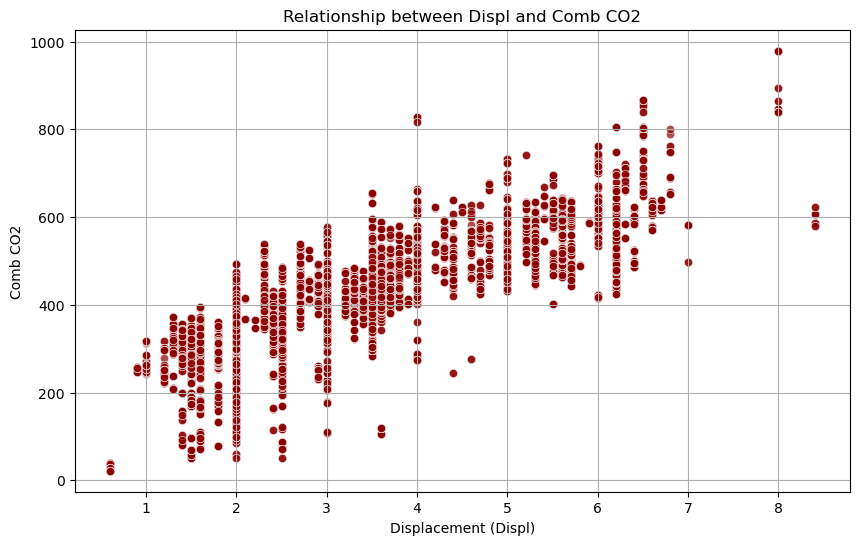

In [66]:
ICE_cars = data[data['Displ'] != 'EV']

# Grafiko kūrimas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Displ', y='Comb CO2', data=ICE_cars, alpha=0.7, color='darkred')
plt.title('Relationship between Displ and Comb CO2')
plt.xlabel('Displacement (Displ)')
plt.ylabel('Comb CO2')
plt.grid(True)
plt.show()

Iš šio grafiko galime matyti, jog iš esmės kuo didesnis variklio litražas, tuo ir jo išmetimų skaičius bus didesnis.

###
###
### 3.5. Tikriname hipotezes(5):
##### E. Automobilis bus mažiau taršus jeigu bus varomas elektra arba hibridiniu varikliu
###
###

In [67]:
data['Fuel'].unique()

array(['Gasoline', 'Diesel', 'Ethanol/Gas', 'Gasoline/Electricity',
       'Electricity', 'CNG', 'Hydrogen', 'CNG/Gasoline', 'Ethanol'],
      dtype=object)

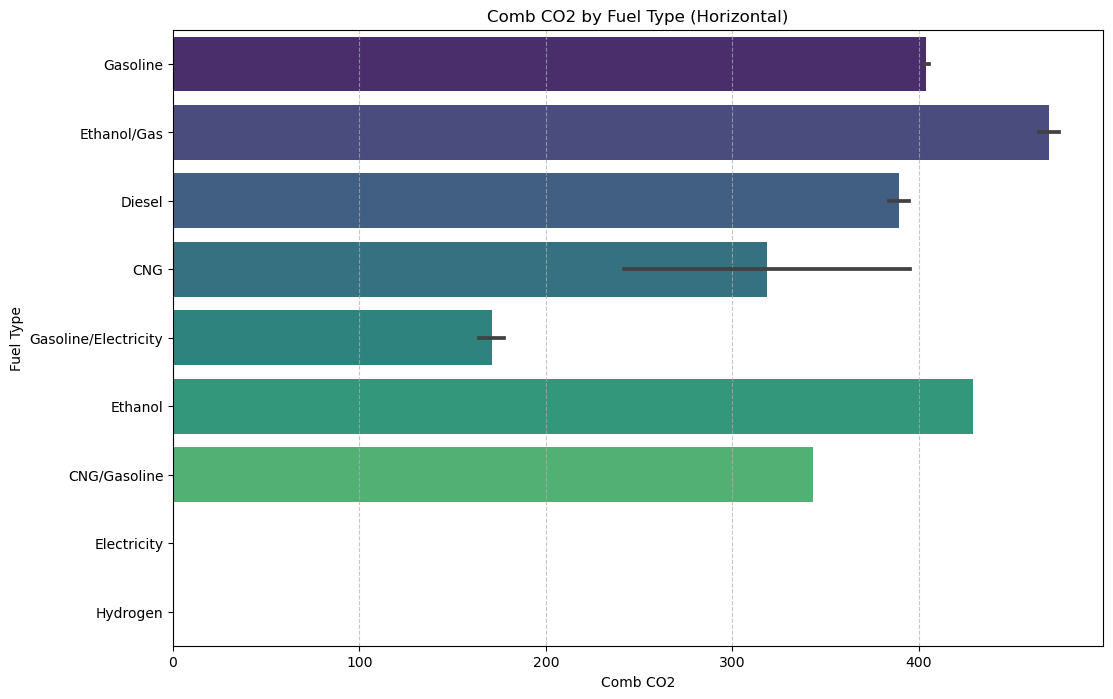

In [68]:
sorted_data = data.sort_values(by='Comb CO2', ascending=False)

# Grafiko kūrimas
plt.figure(figsize=(12, 8))
sns.barplot(x='Comb CO2', y='Fuel', data=sorted_data, palette='viridis')
plt.title('Comb CO2 by Fuel Type (Horizontal)')
plt.xlabel('Comb CO2')
plt.ylabel('Fuel Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Grafike atsispindi mažiausiai išmetimų turintys kuro tipai. Nenuostabu, elektra ir vandenilis čia turi nulines vertes. Kitas švariausias energijos šaltinis yra benzinas/elektra. Kiti kuro tipai turi sąlyginai panašias CO2 reikšmes.

Taigi, galime teigti, jog automobiliai varomi elektra arba hibridiniu varikliu yra mažiau taršūs.

###
###
# 4. Išvados:
Išanalizavome automobilių išmetamųjų dujų tendencijas pagal 5 automobilių technines charakteristikas:
 1. Automobilio naujumą
 2. Kuro sąnaudas
 3. Varančiuosius ratus
 4. Variklio dydį
 5. Kuro tipą

Išanalizavome šias automobilių charakteristikas ir pagal iškeltas hipotezes nustatėme, kad automobiliai mažiau taršūs, jeigu yra naujesni, turi mažesnes kuro sąnaudas, naudojąsi 2 varančiaisiais ratais, turi mažesnį variklį ir yra varomi elektra ar hibridiniu varikliu.